<a href="https://colab.research.google.com/github/vineeth1407/LeetcodeSubmissions/blob/main/LPR_using_yolo11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
!rm -rf yolov8n.pt

In [23]:
#! unzip /content/'Indian Car Bike Number Plate.v2i.yolov8.zip' -d /content/data/

In [24]:
#!pip install ultralytics

In [26]:
import os
import cv2
import numpy as np
import pandas as pd
from tqdm import tqdm
import shutil
from shutil import copyfile
import matplotlib.pyplot as plt
from PIL import Image
import random
import ultralytics
from ultralytics import YOLO
ultralytics.checks()

Ultralytics 8.3.160 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.8/112.6 GB disk)


In [29]:
import os

def convert_polygon_to_bbox(label_dir, output_dir):
    os.makedirs(output_dir, exist_ok=True)

    for fname in os.listdir(label_dir):
        if not fname.endswith(".txt"):
            continue

        new_lines = []
        input_path = os.path.join(label_dir, fname)
        output_path = os.path.join(output_dir, fname)

        with open(input_path, "r") as f:
            for line in f:
                parts = line.strip().split()
                if len(parts) < 6:
                    continue  # already bbox or invalid
                class_id = parts[0]
                coords = list(map(float, parts[1:]))

                xs = coords[::2]
                ys = coords[1::2]

                xmin = min(xs)
                xmax = max(xs)
                ymin = min(ys)
                ymax = max(ys)

                x_center = (xmin + xmax) / 2
                y_center = (ymin + ymax) / 2
                width = xmax - xmin
                height = ymax - ymin

                yolo_line = f"{class_id} {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}"
                new_lines.append(yolo_line)

        with open(output_path, "w") as f:
            f.write("\n".join(new_lines))

# Run for both train and val labels
convert_polygon_to_bbox("/content/data/train/labels_polygon", "/content/data/train/labels")
convert_polygon_to_bbox("/content/data/valid/labels_polygon", "/content/data/valid/labels")
convert_polygon_to_bbox("/content/data/test/labels_polygon", "/content/data/test/labels")


In [25]:
# train: /content/data/train/images
# val: /content/data/valid/images
# test: /content/data/test/images

# nc: 1
# names: ['Indian_Number_Plate']


In [32]:
model = YOLO("yolov8n.pt")

100%|██████████| 6.25M/6.25M [00:00<00:00, 334MB/s]


In [33]:
!yolo task=detect \
mode=train \
model=yolov8n.pt \
data=/content/data/data.yaml \
epochs=20 \
imgsz=640

Ultralytics 8.3.160 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/data/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=Tru

In [ ]:
from ultralytics import YOLO
model = YOLO("runs/detect/train/weights/best.pt")




In [35]:
filename='/content/data/test/images/Bike_DL_01_jpg.rf.75ac79dc9ea56def4fd56d026c53ac3c.jpg'
results = model(filename)



image 1/1 /content/data/test/images/Bike_DL_01_jpg.rf.75ac79dc9ea56def4fd56d026c53ac3c.jpg: 640x480 4 motorcycles, 11.4ms
Speed: 2.5ms preprocess, 11.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)


In [36]:
import matplotlib.pyplot as plt

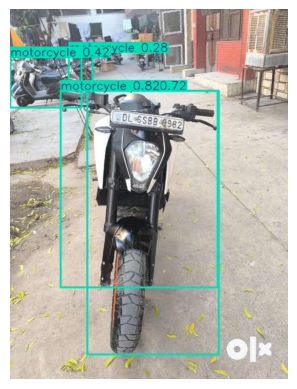

In [37]:
# Visualize
for r in results:
    im_array = r.plot()  # Returns a numpy array
    plt.imshow(cv2.cvtColor(im_array, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()